In [15]:
from adaptive_linear_neuron import (X_std, X, df, np, pd, plot_decision_regions, plt, sns, y)

In [21]:
from numpy.random import seed
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
       Parameters
       ------------
       eta : float
           Learning rate (between 0.0 and 1.0)
       n_iter : int
           Passes over the training dataset.
       Attributes
       -----------
       w_ : 1d-array
           Weights after fitting.
       errors_ : list
           Number of misclassifications in every epoch.
       shuffle : bool (default: True)
           Shuffles training data every epoch
           if True to prevent cycles.
       random_state : int (default: None)
           Set random state for shuffling
           and initializing the weights.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
            
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """ Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target values.
    Returns
    -------
    self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
       
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
       
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
       
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

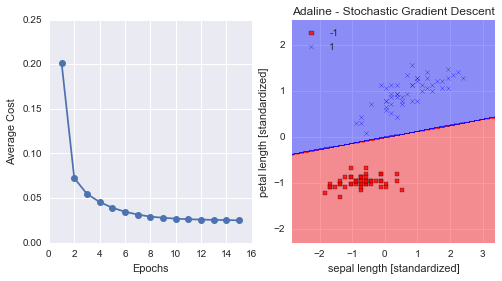

In [42]:
>>> fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
>>> ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
>>> ada.fit(X_std, y)
>>> plot_decision_regions(X_std, y, classifier=ada)
>>> ax[1].set_title('Adaline - Stochastic Gradient Descent')
>>> ax[1].set_xlabel('sepal length [standardized]')
>>> ax[1].set_ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
>>> ax[0].set_xlabel('Epochs')
>>> ax[0].set_ylabel('Average Cost')